<a href="https://colab.research.google.com/github/Sparrow0hawk/covid_stuff/blob/master/notebooks/covid_transport_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating available COVID-19 UK Data

Using: 
- [Mobility data from Apple](https://github.com/ActiveConclusion/COVID19_mobility/blob/master/apple_reports/applemobilitytrends.csv)

- [Collated COVID-19 UK data](https://github.com/tomwhite/covid-19-uk-data)

Ideas:

- [ ] Align case data to mobility data
- [ ] Get police data and map to mobility data
- [ ] More generally explore crime data (probably in Leeds/West Yorks.)


In [1]:
# download apple mobility dataset 
! curl -O https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/apple_reports/applemobilitytrends.csv

# download collated UK covid data (daily case data)
! curl -O https://raw.githubusercontent.com/tomwhite/covid-19-uk-data/master/data/covid-19-cases-uk.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k  100 3881k    0     0  7162k      0 --:--:-- --:--:-- --:--:-- 7162k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777k  100  777k    0     0  3755k      0 --:--:-- --:--:-- --:--:-- 3755k


In [2]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# load mobility dataset and check head
mob_dataset = pd.read_csv('applemobilitytrends.csv')

mob_dataset.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,45.51,56.09,51.12,59.04,61.14,65.34,56.11,53.39,73.94,66.27,65.59,66.11,67.85,67.47,68.61,90.62,88.33,89.97,84.30,93.46,102.16,111.59,93.78,95.51,92.69,96.27,115.30,126.24,129.96,101.84,97.59,95.12,99.95,119.85,136.26,128.16,109.24,105.57,113.27,115.80
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,45.20,67.46,63.20,66.57,67.97,68.49,48.02,42.56,74.97,70.66,65.67,67.16,69.89,56.67,59.53,84.18,93.86,87.72,94.75,83.24,81.96,87.25,87.38,90.83,91.09,89.13,97.74,97.95,77.91,88.49,92.28,89.77,94.63,96.59,97.74,84.18,96.67,97.83,103.88,105.03
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,22.01,40.01,41.34,41.53,41.52,47.52,41.34,23.81,28.11,40.86,42.91,43.77,48.26,40.39,23.77,39.64,41.88,43.77,45.84,52.26,47.48,27.32,44.06,47.00,48.10,49.36,56.59,52.09,30.96,33.74,48.36,49.04,50.71,60.57,57.48,32.01,42.79,46.38,48.12,50.61
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,18.49,30.79,30.37,28.85,29.04,31.99,31.40,16.83,21.37,30.85,33.27,32.63,34.67,28.70,17.40,29.50,31.25,30.65,31.93,37.34,33.53,19.60,34.36,35.81,36.25,36.61,41.45,35.27,21.26,25.34,35.80,36.15,37.47,42.79,40.95,24.00,31.28,33.56,34.09,36.12
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,72.17,73.58,75.83,76.35,81.42,82.51,65.78,74.12,77.10,79.92,82.65,88.37,92.70,73.04,78.07,80.87,84.72,88.62,100.24,104.34,83.85,85.16,86.92,88.07,90.36,98.28,100.97,81.74,86.30,89.68,92.79,94.78,103.06,106.05,85.04,88.15,91.10,94.49,97.77,106.30


In [4]:
# load daily case dataset and check head
daycase_dat = pd.read_csv('covid-19-cases-uk.csv')

daycase_dat.head()

,Date,Country,AreaCode,Area,TotalCases
0,2020-01-30,England,E06000014,York,1.0
1,2020-02-03,England,E10000008,Devon,2.0
2,2020-02-03,England,E10000015,Hertfordshire,1.0
3,2020-02-03,England,E10000016,Kent,1.0
4,2020-02-03,England,E08000016,Barnsley,1.0


Text(0.5, 1.0, 'Proportion of NA data')

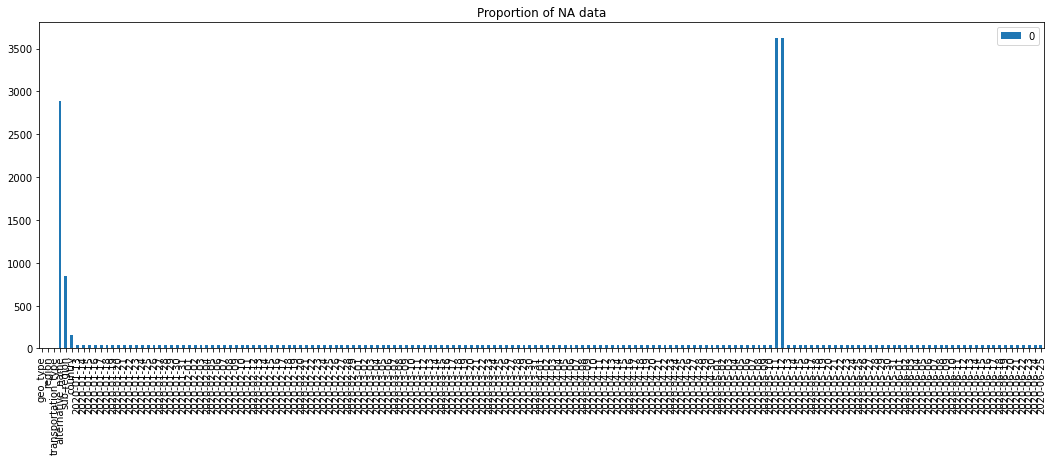

In [5]:
# see how much NA data in mobility dataset there is
pd.DataFrame(mob_dataset.isna().sum()).plot.bar(figsize=(18,6))

plt.title('Proportion of NA data')

Text(0.5, 1.0, 'Proportion of NA data')

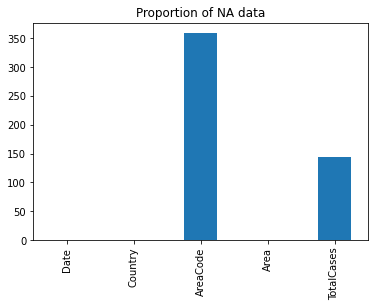

In [6]:
# see how much NA data in mobility dataset there is
daycase_dat.isna().sum().plot.bar()

plt.title('Proportion of NA data')

## Exploring Mobility dataset

In [7]:
UK_dat = mob_dataset[mob_dataset.country == "United Kingdom"]

UK_dat.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25
218,city,Belfast,driving,NaN,Northern Ireland,United Kingdom,100.0,108.49,111.95,124.10,125.70,121.01,81.15,105.81,111.29,117.19,111.33,123.62,120.68,83.35,104.53,111.83,113.30,122.51,127.43,126.86,88.98,103.86,111.70,114.45,115.24,123.25,116.00,77.55,107.16,105.29,115.25,121.03,128.31,116.11,...,43.95,55.90,63.63,66.24,68.07,76.52,71.76,59.14,70.46,73.97,74.83,79.61,88.82,82.05,67.40,78.32,77.98,78.37,75.85,86.38,77.98,67.30,75.51,80.01,79.74,86.63,92.44,93.41,75.58,86.49,88.45,86.84,91.51,100.90,101.31,68.40,88.22,92.40,101.75,102.63
219,city,Belfast,transit,NaN,Northern Ireland,United Kingdom,100.0,100.20,103.68,118.45,113.70,104.21,92.71,103.94,101.94,107.15,100.33,111.23,105.68,84.43,99.40,107.55,106.08,111.97,107.49,103.54,93.65,97.73,95.79,114.51,120.25,100.67,95.59,90.37,109.63,100.00,117.98,101.40,121.59,103.54,...,18.25,25.20,27.81,26.00,25.53,20.79,16.51,25.00,26.80,25.80,28.54,29.01,22.93,27.54,30.01,32.95,32.42,31.02,29.61,22.93,28.14,23.06,28.94,32.29,28.41,24.40,28.94,32.69,29.81,34.76,33.29,31.28,31.35,32.29,32.89,28.28,37.77,38.57,41.38,43.32
220,city,Belfast,walking,NaN,Northern Ireland,United Kingdom,100.0,116.70,123.20,127.89,147.78,179.12,93.03,121.72,127.02,128.53,120.19,152.23,165.74,94.30,112.80,111.06,131.11,135.05,150.14,190.08,100.42,107.81,119.34,133.00,131.19,145.62,163.31,84.72,110.88,104.86,130.82,137.68,174.50,180.12,...,35.91,48.71,52.19,58.72,57.87,58.86,55.51,48.21,63.38,57.57,60.01,65.53,74.33,69.47,51.62,61.63,59.25,58.84,53.08,60.56,62.18,48.54,55.73,58.66,56.86,67.49,65.90,72.00,52.53,66.37,61.71,65.03,64.86,72.60,76.06,44.21,66.23,68.76,75.64,73.34
234,city,Birmingham,driving,NaN,England,United Kingdom,100.0,104.03,102.98,103.80,105.29,102.57,85.85,104.19,107.52,106.28,107.32,109.67,106.49,87.77,99.69,108.12,108.75,102.93,110.65,106.63,89.76,99.36,105.25,104.19,107.74,114.86,104.45,84.46,103.17,108.72,106.75,106.71,118.65,103.96,...,51.65,60.57,64.60,66.88,66.76,73.42,65.66,56.99,66.59,74.01,74.69,76.36,81.95,75.50,68.77,76.56,78.20,71.70,73.19,77.39,70.36,60.43,72.37,74.39,73.91,73.18,80.08,80.25,69.46,79.50,78.46,78.50,79.40,87.23,86.53,71.50,85.26,89.11,92.19,93.81
235,city,Birmingham,transit,NaN,England,United Kingdom,100.0,102.32,103.58,100.84,97.53,87.24,83.08,102.35,103.16,106.99,100.85,99.86,90.47,83.71,103.48,106.51,105.37,103.24,98.45,88.86,82.38,101.36,105.08,108.81,102.72,103.46,89.19,80.68,101.47,105.77,107.16,103.45,104.24,88.53,...,26.26,29.45,28.45,31.57,27.89,30.04,26.10,26.43,31.70,35.37,35.58,34.98,34.37,32.84,34.66,39.77,40.82,34.32,34.79,34.23,28.68,31.55,38.50,39.40,38.22,38.46,39.79,33.58,35.57,42.59,44.14,41.51,41.32,42.88,39.32,35.84,48.18,50.92,52.72,53.58


In [8]:
UK_dat.columns

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25'],
      dtype='object', length=171)

In [9]:
UK_dat.shape

(55, 171)

In [10]:
UK_dat.region.unique()

array(['Belfast', 'Birmingham', 'Bradford', 'Bristol', 'Cardiff',
       'Edinburgh', 'Glasgow', 'Leeds', 'Liverpool', 'London',
       'Manchester', 'Newcastle upon Tyne', 'Nottingham', 'Portsmouth',
       'Reading', 'Sheffield', 'Bailiwick of Guernsey',
       'Bailiwick of Jersey', 'England', 'Isle of Man',
       'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

In [11]:
points_of_int = ['Belfast', 'Birmingham', 'Bradford', 'Bristol', 'Cardiff',
       'Edinburgh', 'Glasgow', 'Leeds', 'Liverpool', 'London',
       'Manchester', 'Newcastle upon Tyne', 'Nottingham', 'Portsmouth',
       'Reading', 'Sheffield']

print(len(points_of_int))

16


In [12]:
UK_dat_working = UK_dat.copy()

UK_dat_working = UK_dat_working.drop(['geo_type', 'alternative_name','sub-region', 'country'], axis=1)

In [13]:
UK_dat_working.head()

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,...,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25
218,Belfast,driving,100.0,108.49,111.95,124.10,125.70,121.01,81.15,105.81,111.29,117.19,111.33,123.62,120.68,83.35,104.53,111.83,113.30,122.51,127.43,126.86,88.98,103.86,111.70,114.45,115.24,123.25,116.00,77.55,107.16,105.29,115.25,121.03,128.31,116.11,86.77,115.35,121.93,128.35,...,43.95,55.90,63.63,66.24,68.07,76.52,71.76,59.14,70.46,73.97,74.83,79.61,88.82,82.05,67.40,78.32,77.98,78.37,75.85,86.38,77.98,67.30,75.51,80.01,79.74,86.63,92.44,93.41,75.58,86.49,88.45,86.84,91.51,100.90,101.31,68.40,88.22,92.40,101.75,102.63
219,Belfast,transit,100.0,100.20,103.68,118.45,113.70,104.21,92.71,103.94,101.94,107.15,100.33,111.23,105.68,84.43,99.40,107.55,106.08,111.97,107.49,103.54,93.65,97.73,95.79,114.51,120.25,100.67,95.59,90.37,109.63,100.00,117.98,101.40,121.59,103.54,99.20,123.33,133.29,129.68,...,18.25,25.20,27.81,26.00,25.53,20.79,16.51,25.00,26.80,25.80,28.54,29.01,22.93,27.54,30.01,32.95,32.42,31.02,29.61,22.93,28.14,23.06,28.94,32.29,28.41,24.40,28.94,32.69,29.81,34.76,33.29,31.28,31.35,32.29,32.89,28.28,37.77,38.57,41.38,43.32
220,Belfast,walking,100.0,116.70,123.20,127.89,147.78,179.12,93.03,121.72,127.02,128.53,120.19,152.23,165.74,94.30,112.80,111.06,131.11,135.05,150.14,190.08,100.42,107.81,119.34,133.00,131.19,145.62,163.31,84.72,110.88,104.86,130.82,137.68,174.50,180.12,110.67,140.92,149.26,155.51,...,35.91,48.71,52.19,58.72,57.87,58.86,55.51,48.21,63.38,57.57,60.01,65.53,74.33,69.47,51.62,61.63,59.25,58.84,53.08,60.56,62.18,48.54,55.73,58.66,56.86,67.49,65.90,72.00,52.53,66.37,61.71,65.03,64.86,72.60,76.06,44.21,66.23,68.76,75.64,73.34
234,Birmingham,driving,100.0,104.03,102.98,103.80,105.29,102.57,85.85,104.19,107.52,106.28,107.32,109.67,106.49,87.77,99.69,108.12,108.75,102.93,110.65,106.63,89.76,99.36,105.25,104.19,107.74,114.86,104.45,84.46,103.17,108.72,106.75,106.71,118.65,103.96,95.88,112.14,113.38,117.40,...,51.65,60.57,64.60,66.88,66.76,73.42,65.66,56.99,66.59,74.01,74.69,76.36,81.95,75.50,68.77,76.56,78.20,71.70,73.19,77.39,70.36,60.43,72.37,74.39,73.91,73.18,80.08,80.25,69.46,79.50,78.46,78.50,79.40,87.23,86.53,71.50,85.26,89.11,92.19,93.81
235,Birmingham,transit,100.0,102.32,103.58,100.84,97.53,87.24,83.08,102.35,103.16,106.99,100.85,99.86,90.47,83.71,103.48,106.51,105.37,103.24,98.45,88.86,82.38,101.36,105.08,108.81,102.72,103.46,89.19,80.68,101.47,105.77,107.16,103.45,104.24,88.53,86.75,106.79,110.96,110.95,...,26.26,29.45,28.45,31.57,27.89,30.04,26.10,26.43,31.70,35.37,35.58,34.98,34.37,32.84,34.66,39.77,40.82,34.32,34.79,34.23,28.68,31.55,38.50,39.40,38.22,38.46,39.79,33.58,35.57,42.59,44.14,41.51,41.32,42.88,39.32,35.84,48.18,50.92,52.72,53.58


In [14]:
UK_dat_working.set_index('transportation_type').iloc[:3,1:].T

transportation_type,driving,transit,walking
2020-01-13,100.00,100.00,100.00
2020-01-14,108.49,100.20,116.70
2020-01-15,111.95,103.68,123.20
2020-01-16,124.10,118.45,127.89
2020-01-17,125.70,113.70,147.78
...,...,...,...
2020-06-21,68.40,28.28,44.21
2020-06-22,88.22,37.77,66.23
2020-06-23,92.40,38.57,68.76
2020-06-24,101.75,41.38,75.64


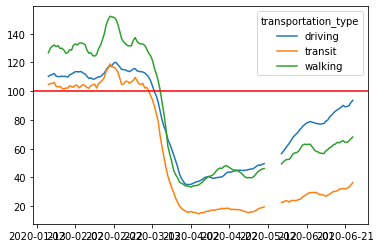

In [15]:
UK_dat_working.set_index('transportation_type').iloc[:3,1:].T.rolling(7).mean().plot()

plt.axhline(100, color='r')

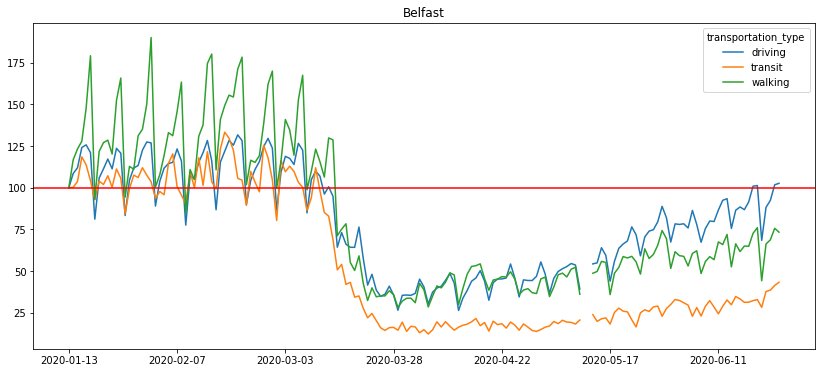

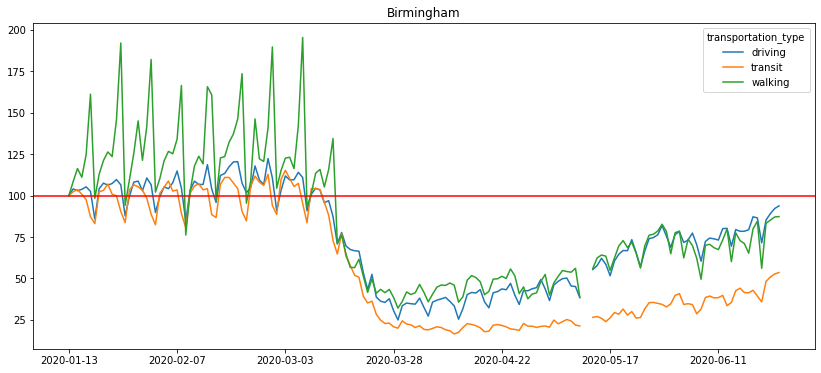

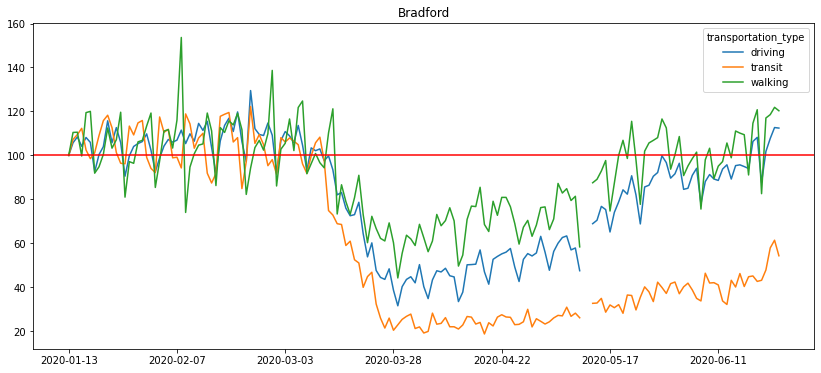

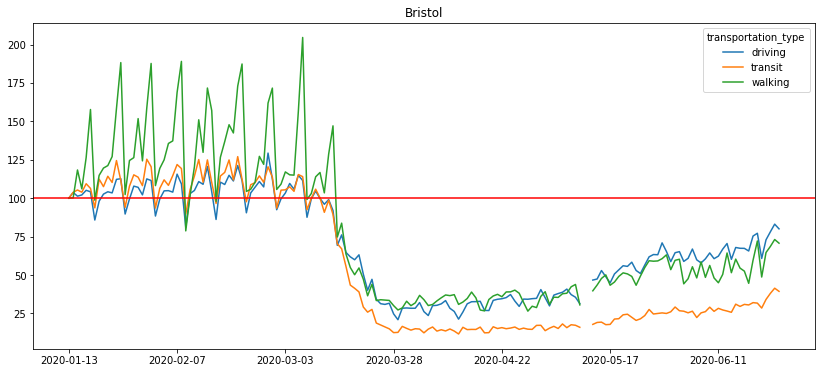

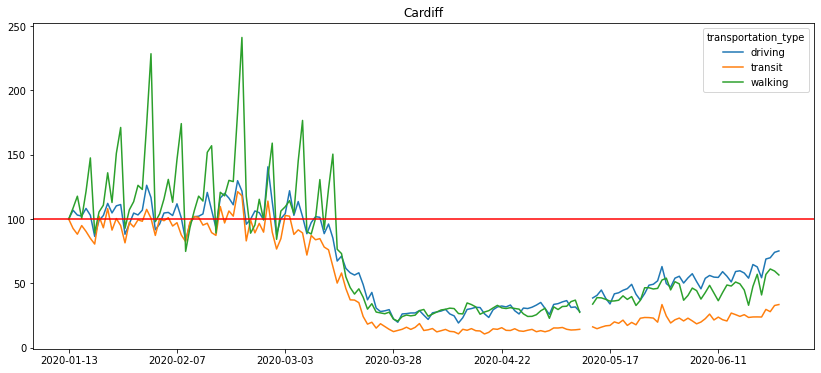

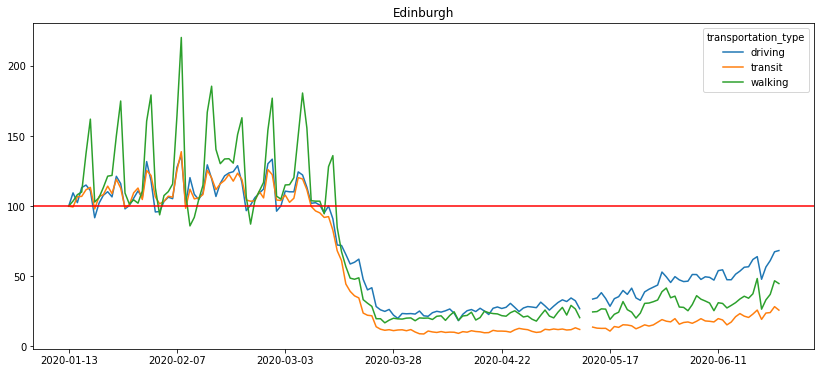

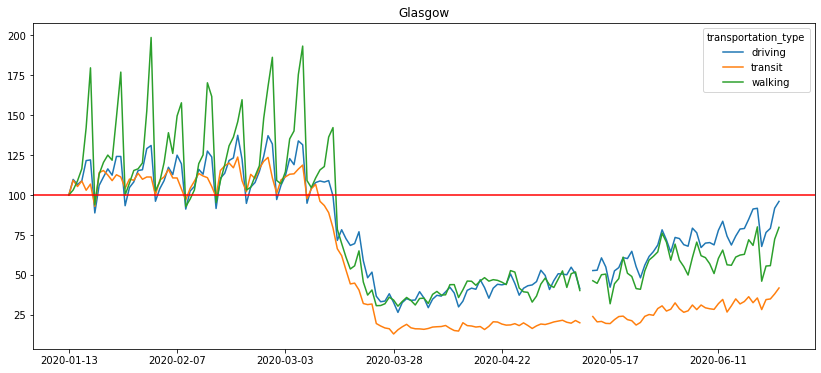

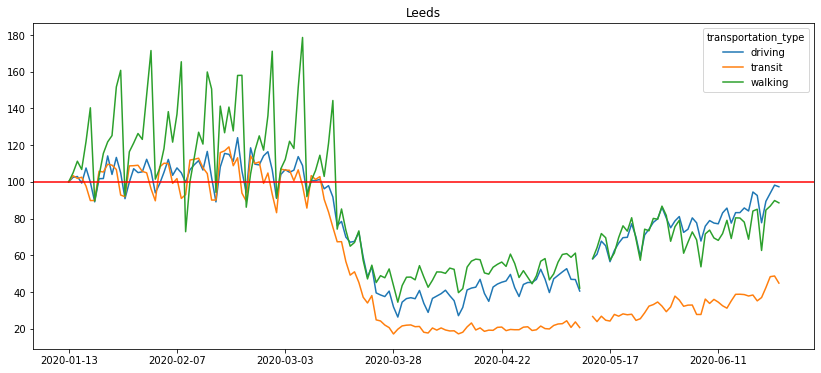

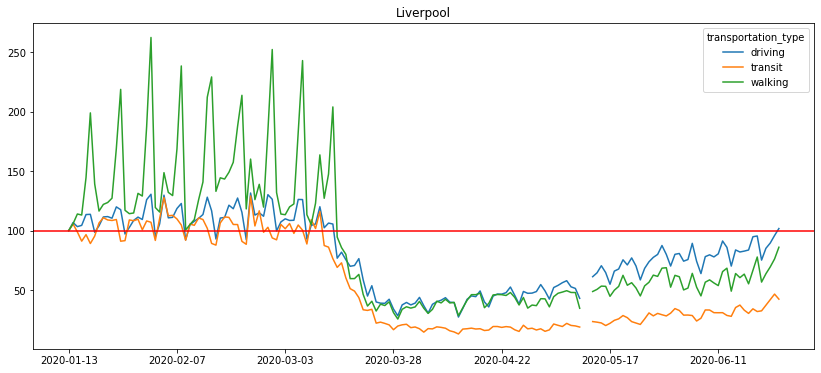

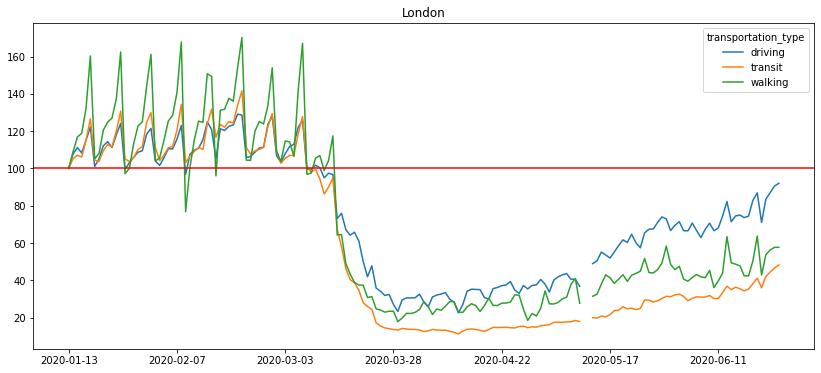

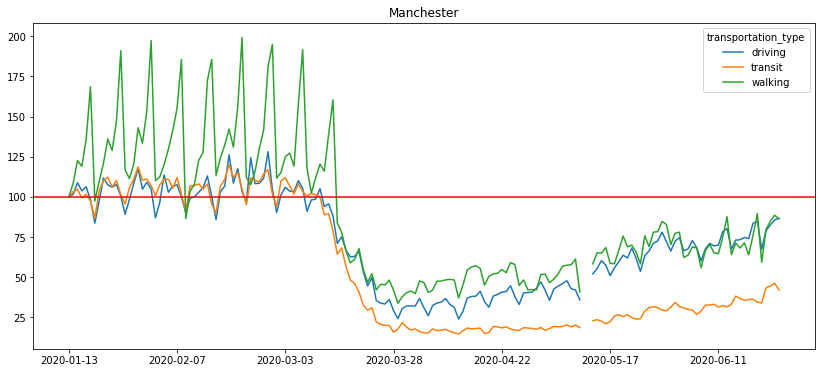

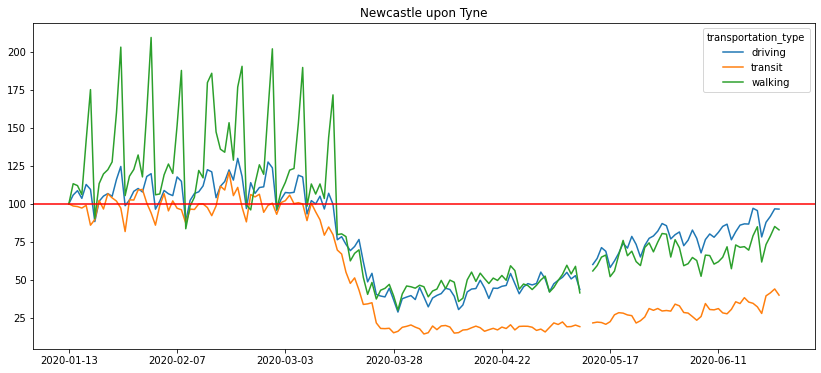

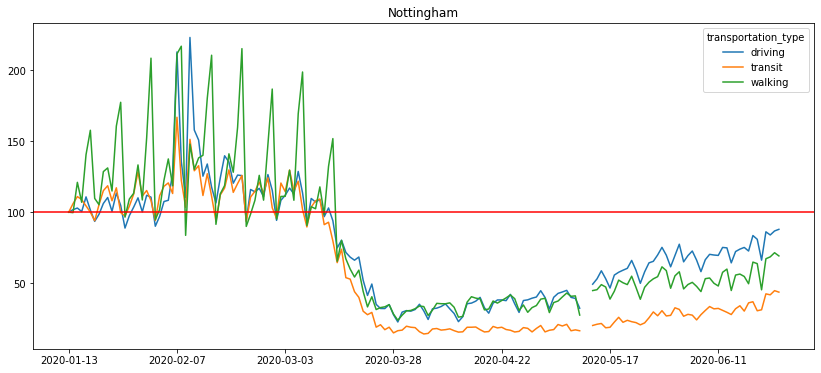

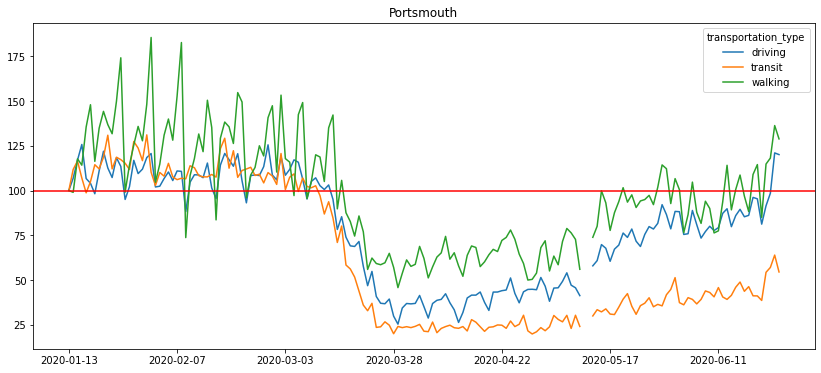

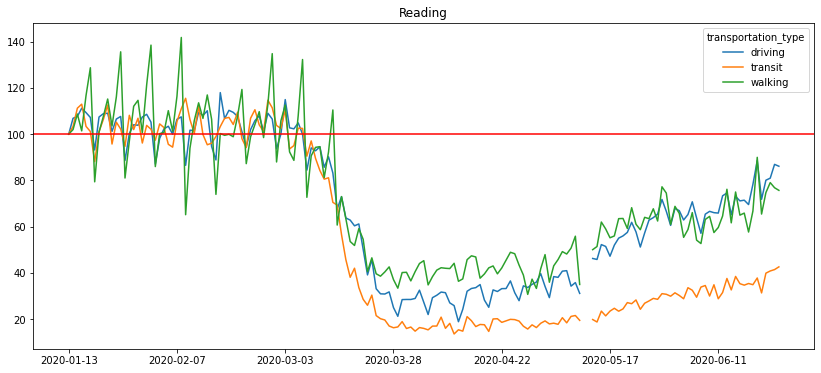

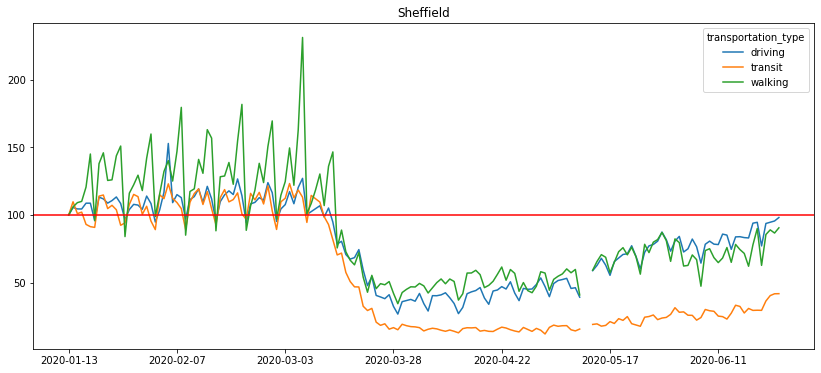

In [16]:
for city in points_of_int:
  working_frame = UK_dat_working[UK_dat_working.region == city].copy()

  working_frame.drop(['region'], axis=1, inplace=True)

  working_frame.set_index('transportation_type').T.plot(figsize=(14,6))

  plt.axhline(100, color='r')

  plt.title(city)

  plt.figure()

  plt.close()

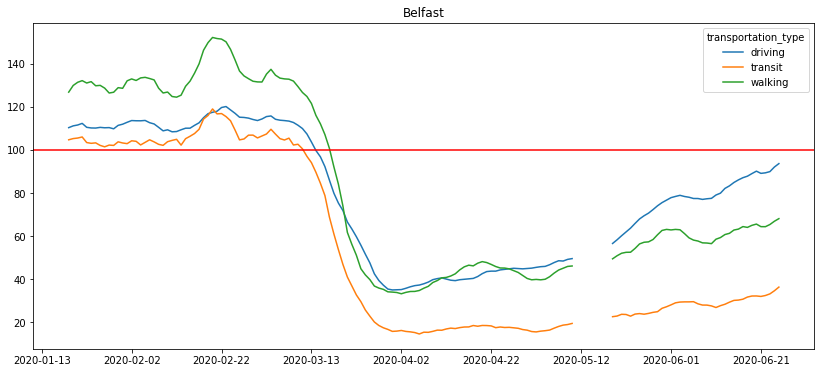

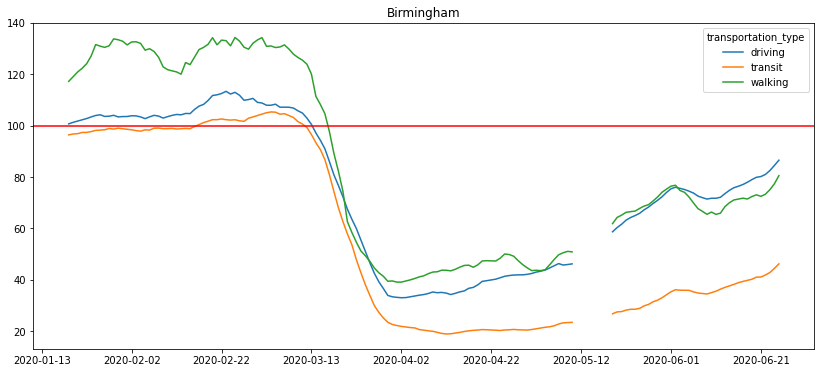

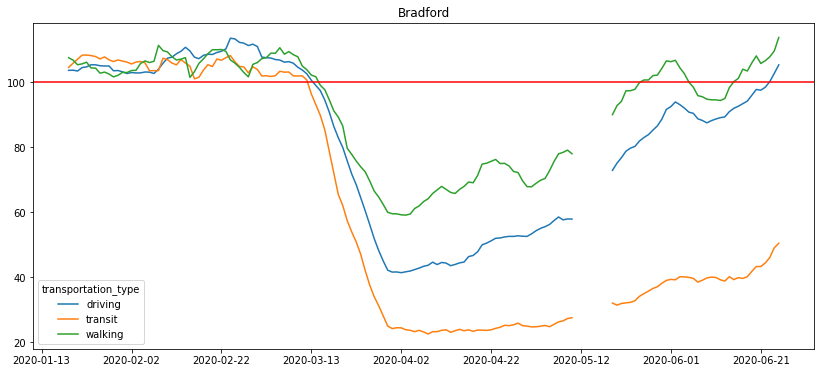

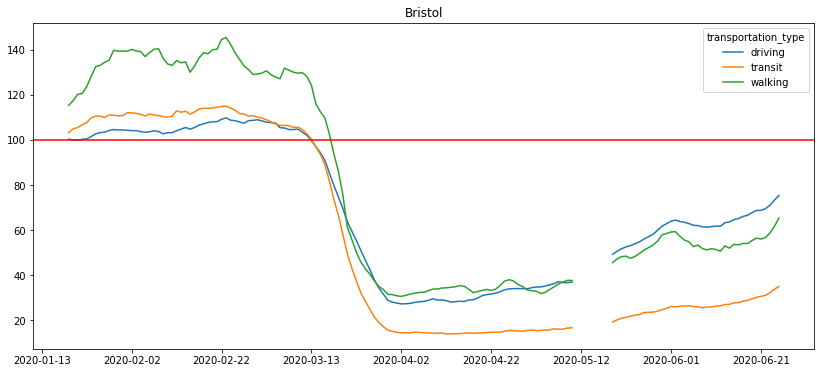

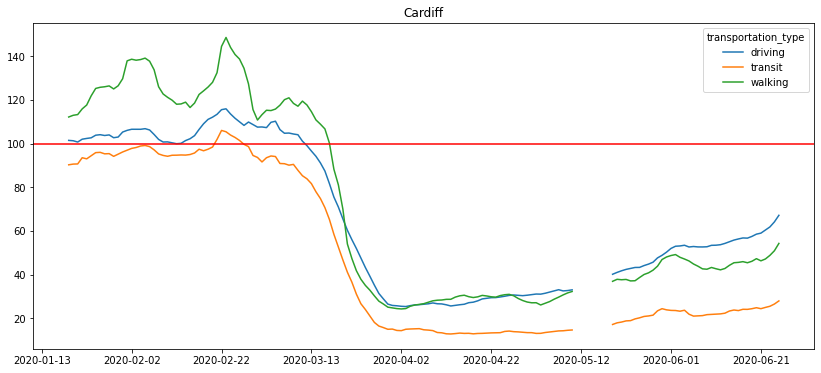

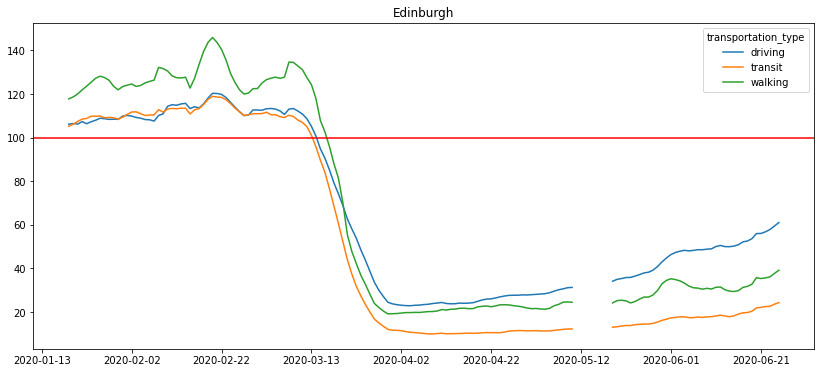

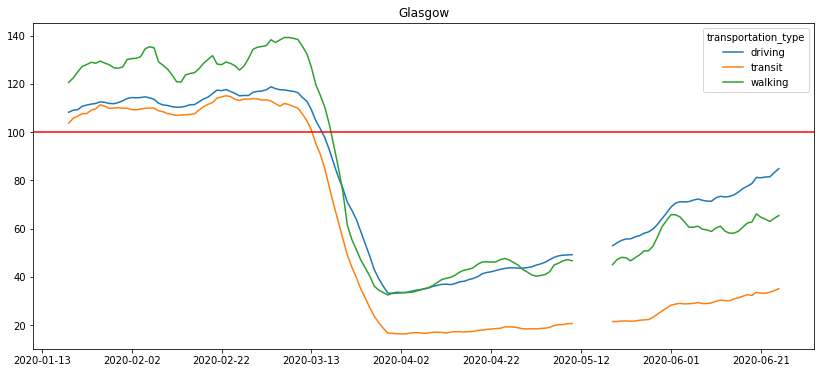

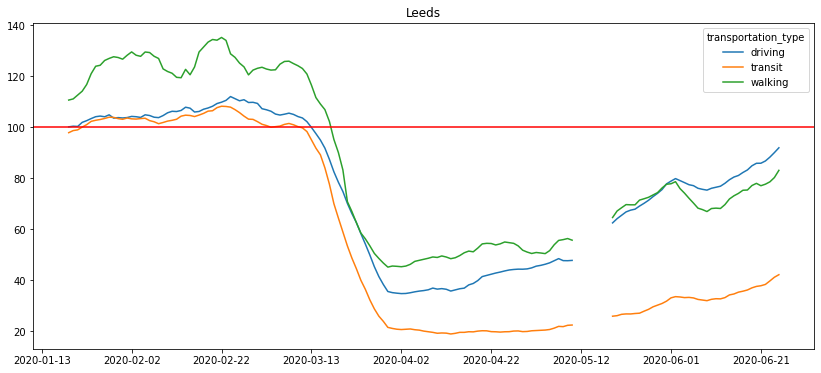

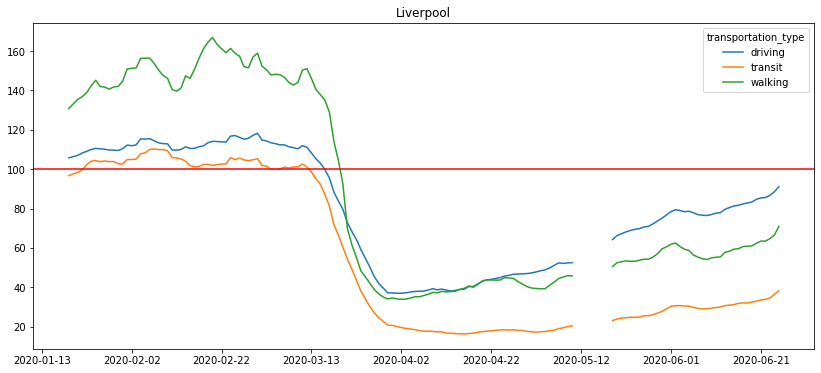

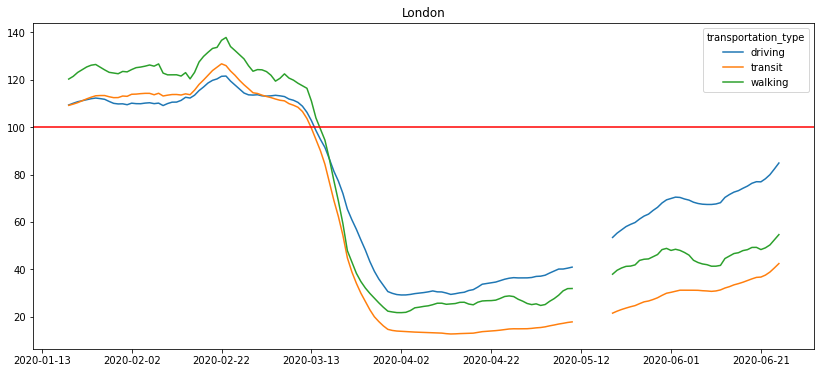

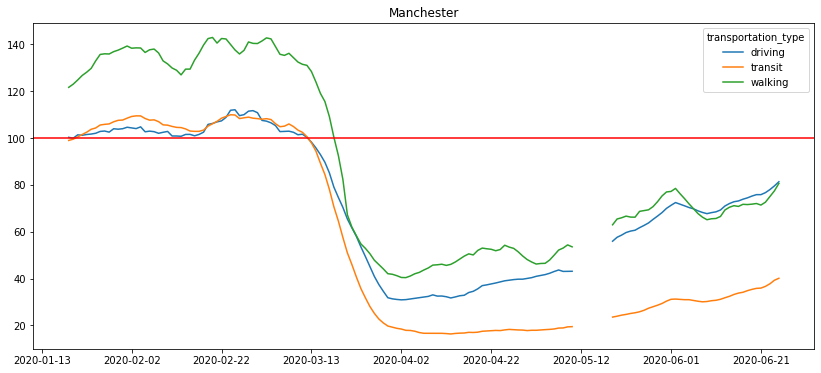

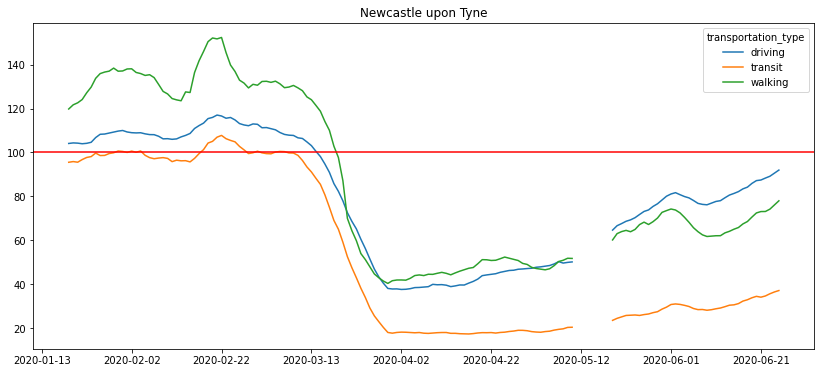

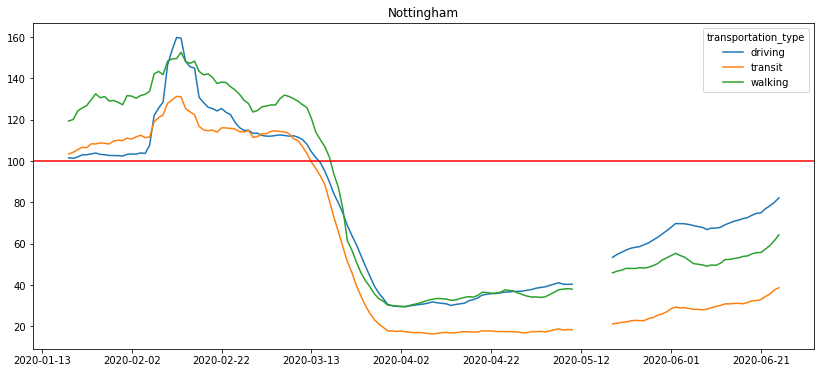

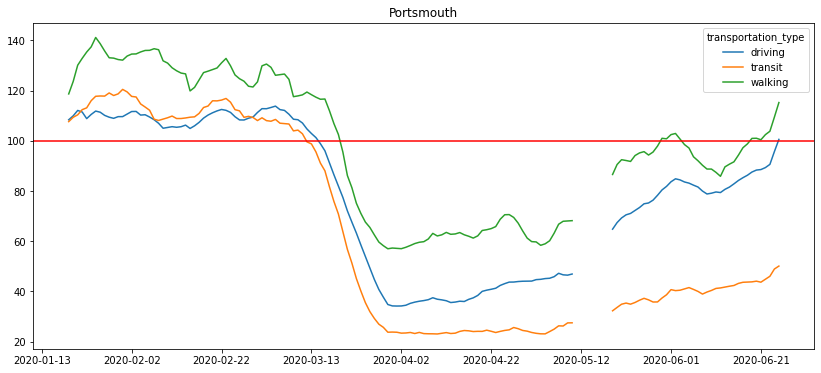

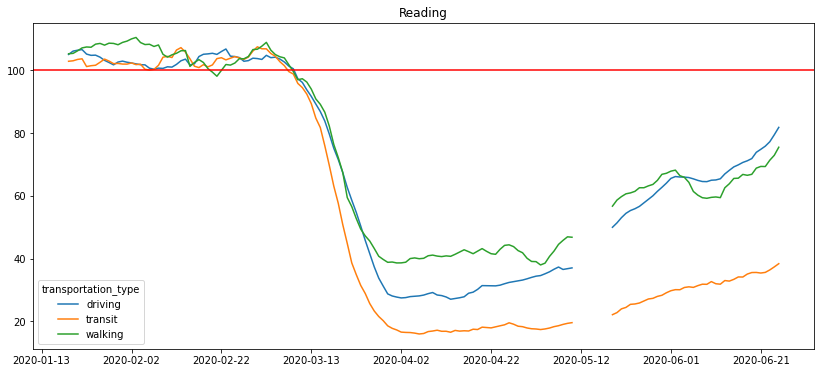

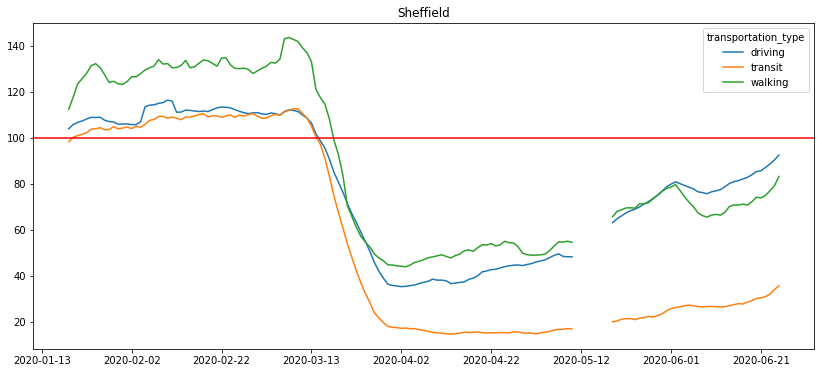

In [17]:
for city in points_of_int:
  working_frame = UK_dat_working[UK_dat_working.region == city].copy()

  working_frame.drop(['region'], axis=1, inplace=True)

  working_frame.set_index('transportation_type').T.rolling(7).mean().plot(figsize=(14,6))

  plt.axhline(100, color='r')

  plt.title(city)

  plt.figure()

  plt.close()

## Exploring Daily cases dataset

In [7]:
daycase_dat_noNA = daycase_dat.dropna(subset=['AreaCode'])

In [8]:
daycase_dat_noNA.tail()

,Date,Country,AreaCode,Area,TotalCases
17461,2020-06-27,Northern Ireland,N09000006,Fermanagh and Omagh,86.0
17462,2020-06-27,Northern Ireland,N09000007,Lisburn and Castlereagh,455.0
17463,2020-06-27,Northern Ireland,N09000008,Mid and East Antrim,334.0
17464,2020-06-27,Northern Ireland,N09000009,Mid Ulster,257.0
17465,2020-06-27,Northern Ireland,N09000010,"Newry, Mourne and Down",293.0


In [9]:
# a west yorkshire plus some extra list of local authorities to inspect
west_yorks_extra = ['Leeds','Wakefield','Sheffield',
                                             'Doncaster','Calderdale','Barnsley',
                                             'Bradford','Kirklees']

In [10]:
daycase_dat_noNA.columns

Index(['Date', 'Country', 'AreaCode', 'Area', 'TotalCases'], dtype='object')

In [11]:
WYextra = daycase_dat_noNA[daycase_dat_noNA.Area.isin(west_yorks_extra)]

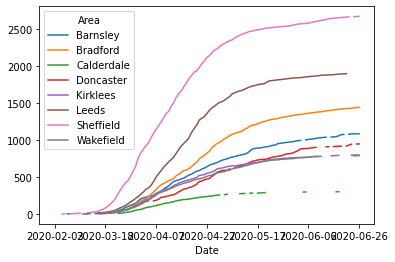

In [12]:
WYextra.pivot(index='Date',columns='Area', values='TotalCases').plot()

In [13]:
WYextra.tail(9)

,Date,Country,AreaCode,Area,TotalCases
17267,2020-06-25,England,E08000036,Wakefield,790.0
17306,2020-06-26,England,E08000035,Leeds,1902.0
17348,2020-06-26,England,E08000034,Kirklees,800.0
17370,2020-06-26,England,E08000032,Bradford,1446.0
17377,2020-06-26,England,E08000017,Doncaster,949.0
17405,2020-06-26,England,E08000016,Barnsley,1087.0
17408,2020-06-26,England,E08000033,Calderdale,303.0
17427,2020-06-26,England,E08000019,Sheffield,2679.0
17436,2020-06-26,England,E08000036,Wakefield,790.0


In [14]:
WYextra.pivot(index='Date',columns='Area', values='TotalCases')

Area,Barnsley,Bradford,Calderdale,Doncaster,Kirklees,Leeds,Sheffield,Wakefield
Date,,,,,,,,
2020-02-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-03-01,NaN,3.0,NaN,NaN,NaN,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...
2020-06-22,1079.0,1429.0,NaN,934.0,NaN,NaN,2672.0,NaN
2020-06-23,1085.0,1432.0,303.0,945.0,798.0,NaN,NaN,NaN
2020-06-24,1086.0,1437.0,NaN,NaN,799.0,1902.0,2673.0,786.0


In [17]:
# make some interactive plots with plotly
import plotly.express as px

In [29]:
fig = px.line(data_frame = WYextra, 
        x="Date", y=WYextra["TotalCases"], color='Area')

# remove annoying Area= on legend
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [43]:
daily_diff = WYextra.pivot(index='Date',columns='Area', values='TotalCases') \
  .diff().reset_index().melt(id_vars='Date')

daily_diff.head()

,Date,Area,value
0,2020-02-03,Barnsley,NaN
1,2020-02-20,Barnsley,NaN
2,2020-02-28,Barnsley,NaN
3,2020-02-29,Barnsley,NaN
4,2020-03-01,Barnsley,NaN


In [45]:
fig = px.line(data_frame = daily_diff, 
        x="Date", y="value", color='Area')

# remove annoying Area= on legend
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()